In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [88]:
# https://kaggle-kr.tistory.com/17 이 강의 참고하여 제작.

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅(matplotlib 스타일 변경)
sns.set(font_scale=2.5) #일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

import missingno as msno #데이터 셋의 null데이터를 시각화하는데 사용. https://chunggaeguri.tistory.com/entry/Visualization-missingno-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC-%EC%82%AC%EC%9A%A9%EB%B2%95

#ignore warnings - warning은 무시해도 됨.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#원래 show를 하면 새로운 창을 띄우고 결과를 확인하는데, 바로 노트북에서 확인가능하게함.
#주석 바로 옆에 다는게 안됨. %연산자 때문인가

In [89]:
#null값 등 데이터 셋 확인 -> EDA 사용, 분석, features구함 -> feature engineering(원핫인코딩같은)
#sklearn - 파이썬 라이브러리를 활용한 머신러닝.책에서 보면 좋
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train.head(10)
# 순서가 있는거 CONTINUOUS, 순서 없이 범주만 있는거 CATEGORICAL

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [90]:
df_train.describe()
# passengerid 수와 차이나는 Age -> null 값 있음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# NULL데이터 파악

In [91]:
for col in df_train.columns:
    msg  = 'column {:>10}\t Percent of Value : {:.2f}'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    # formatting으로 정렬. 전체 df_train을 column별로 null값이 있는지 파악하고, 그 갯수를 더한뒤(null값 갯수) 전체 데이터 갯수로 나눠 그 비율 출력
    # true가 1이며, isnull의 결과 true=null데이터이므로 그 값을 더하는것=null의 갯수 를 이용한것
    print(msg)

column PassengerId	 Percent of Value : 0.00
column   Survived	 Percent of Value : 0.00
column     Pclass	 Percent of Value : 0.00
column       Name	 Percent of Value : 0.00
column        Sex	 Percent of Value : 0.00
column        Age	 Percent of Value : 19.87
column      SibSp	 Percent of Value : 0.00
column      Parch	 Percent of Value : 0.00
column     Ticket	 Percent of Value : 0.00
column       Fare	 Percent of Value : 0.00
column      Cabin	 Percent of Value : 77.10
column   Embarked	 Percent of Value : 0.22


In [92]:
for col in df_test.columns:
    msg  = 'column {:>10}\t Percent of Value : {:.2f}'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column PassengerId	 Percent of Value : 0.00
column     Pclass	 Percent of Value : 0.00
column       Name	 Percent of Value : 0.00
column        Sex	 Percent of Value : 0.00
column        Age	 Percent of Value : 20.57
column      SibSp	 Percent of Value : 0.00
column      Parch	 Percent of Value : 0.00
column     Ticket	 Percent of Value : 0.00
column       Fare	 Percent of Value : 0.24
column      Cabin	 Percent of Value : 78.23
column   Embarked	 Percent of Value : 0.00


In [93]:
#Null Data Check
for col in df_train.columns: #null값 비율 확인: Age,Cabin,Embarked에 존재함 확인
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [94]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

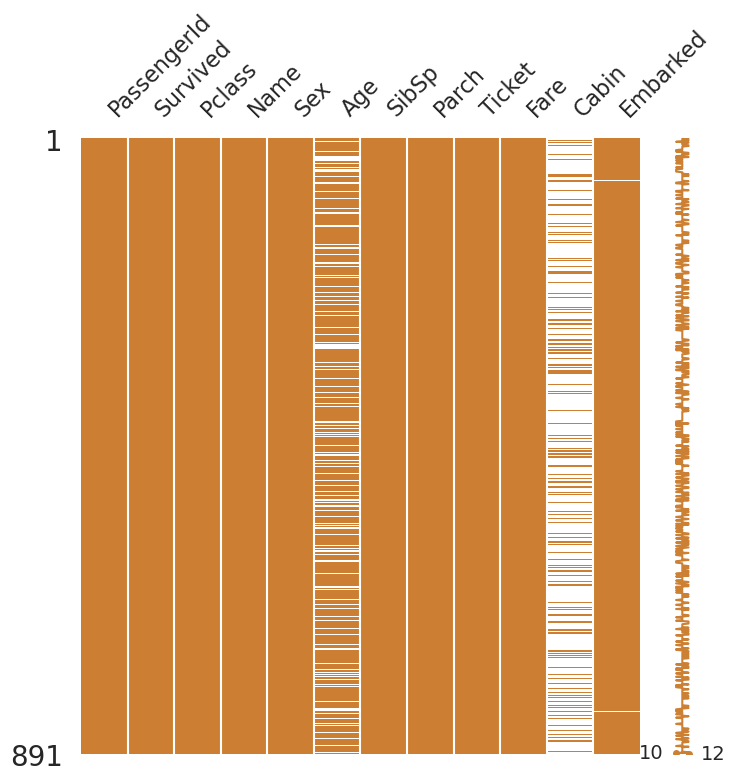

In [95]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
# df_train.iloc[:, :]모든 데이터 다 가져옴, 걍 df_train으로 써도 변함이 없는데....??, color = rgb
# matrix는 행렬형태(null데이터의 분포 - 위치 파악), bar는 바그래프 형태(직접적인 null의 비율 확인)

<Axes: >

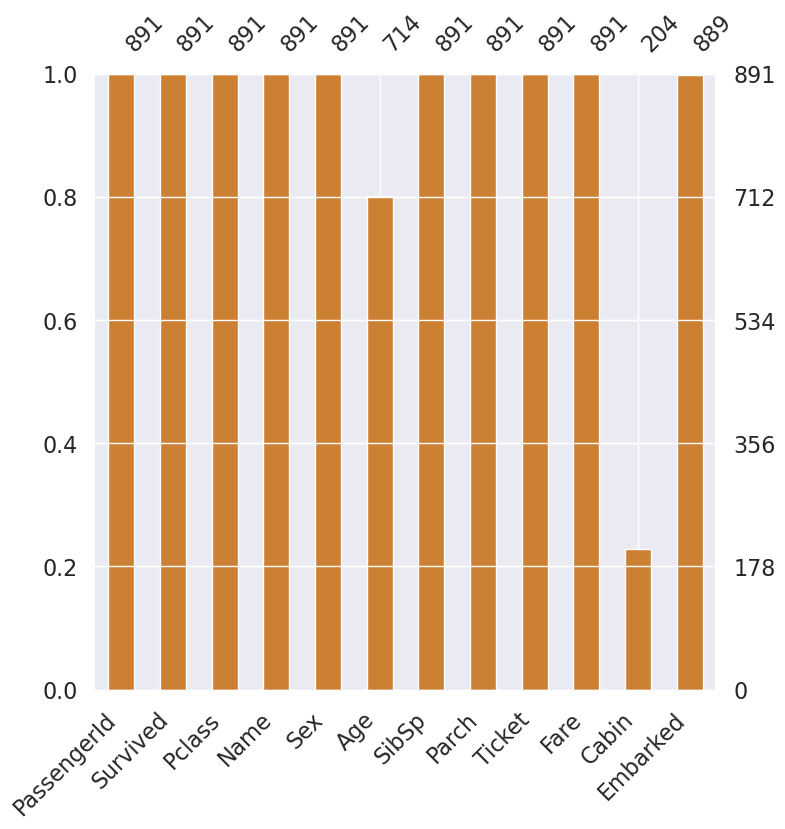

In [96]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

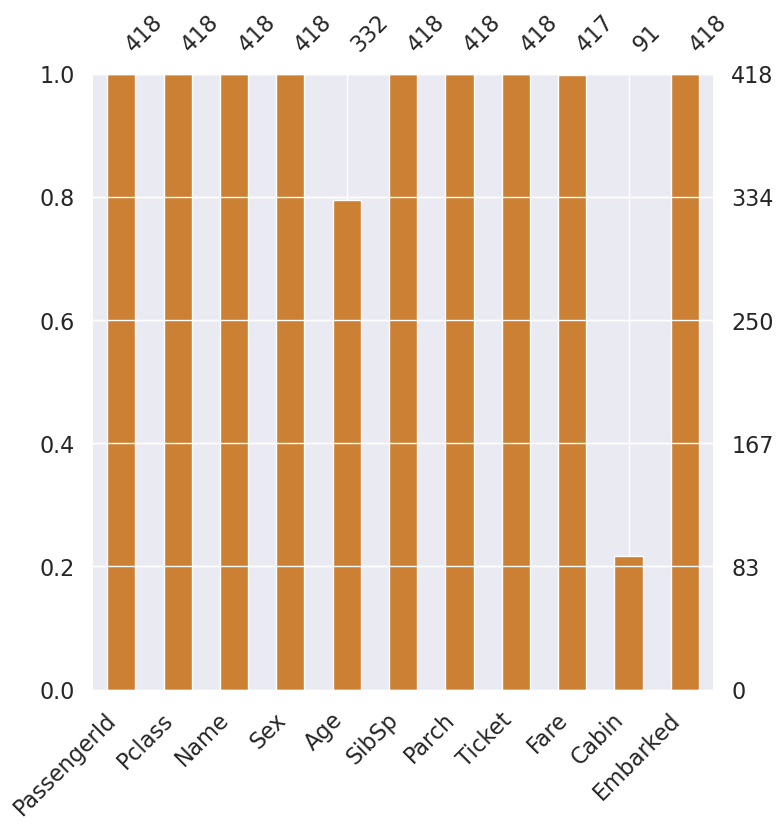

In [97]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

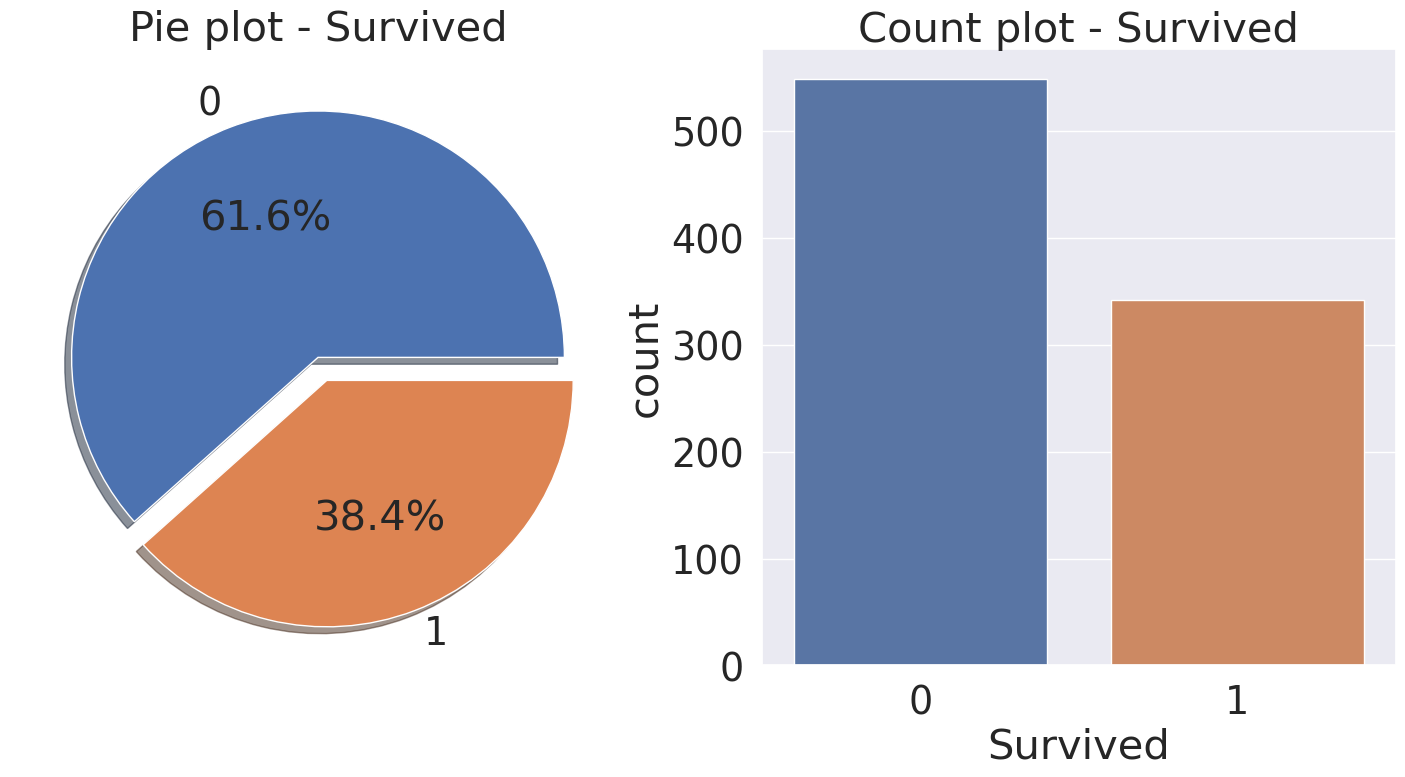

In [98]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열의 그래프가 들어갈 공간(18,8크기) 준비

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
#값의 갯수 확인 - pie그래프로 그리기, plt.plot()이든, ().plot이든 역할은 같음, explode = 0,1값 분리
#autopct = 퍼센트 표시, ax = 어느 공간에 들어갈지(1행1열), shadow = 음영처리
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1]) 
# survived의 값을 세는 것.(x='컬럼의 이름', x=꼭 들어가야함, 안그럼 데이터가 2개 들어온것으로 취급됨), 데이터, 2번공간 
ax[1].set_title('Count plot - Survived')

plt.show()

In [99]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() #각 클래스에 몇명이 있는지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [100]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() #생존률과 같음, as_index = False로 해야지 다음에 그림그릴수 있긴 함.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [101]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True) #교차하여 각 항목 출력(ALL = margin관여)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [102]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)
#as_index = False로 하면 둘다 plot, 아니면 하나만 plot.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass'>

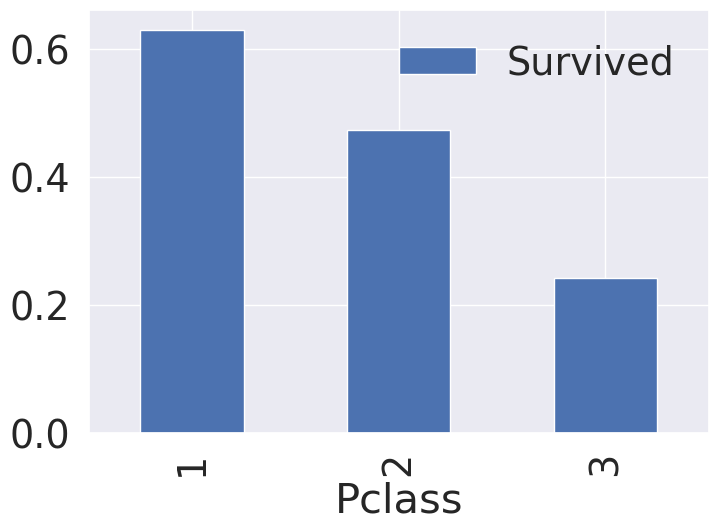

In [103]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

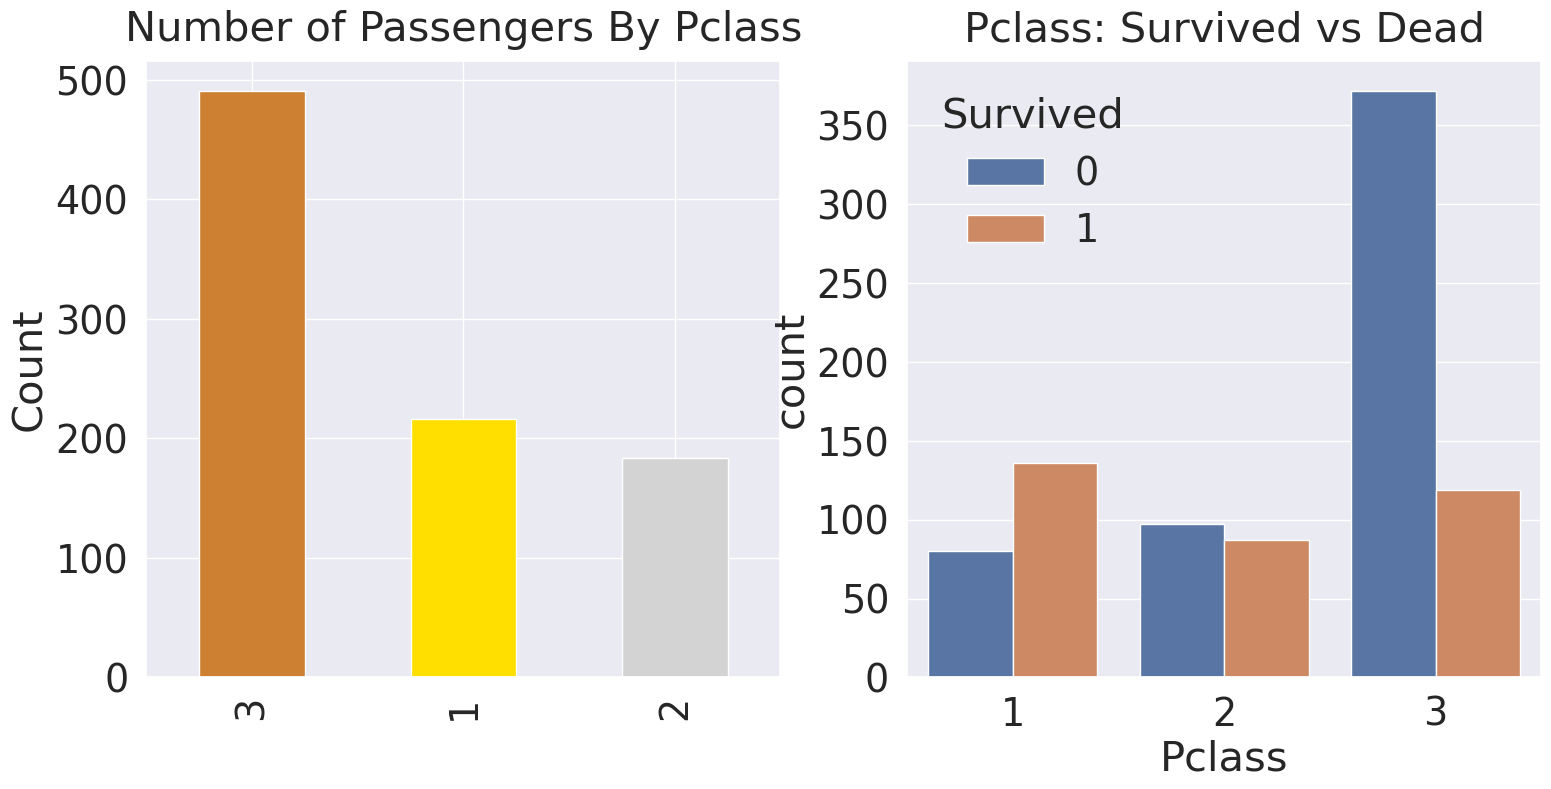

In [104]:
#label에 따른 개수 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1]) #위와 같이 x= 추가해야 정상동작
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()
#클래스가 높을 수록 생존확률도 높으므로 생존에 pclass가 큰 영향을 미침. feature로 사용하기 적합.

# Sex

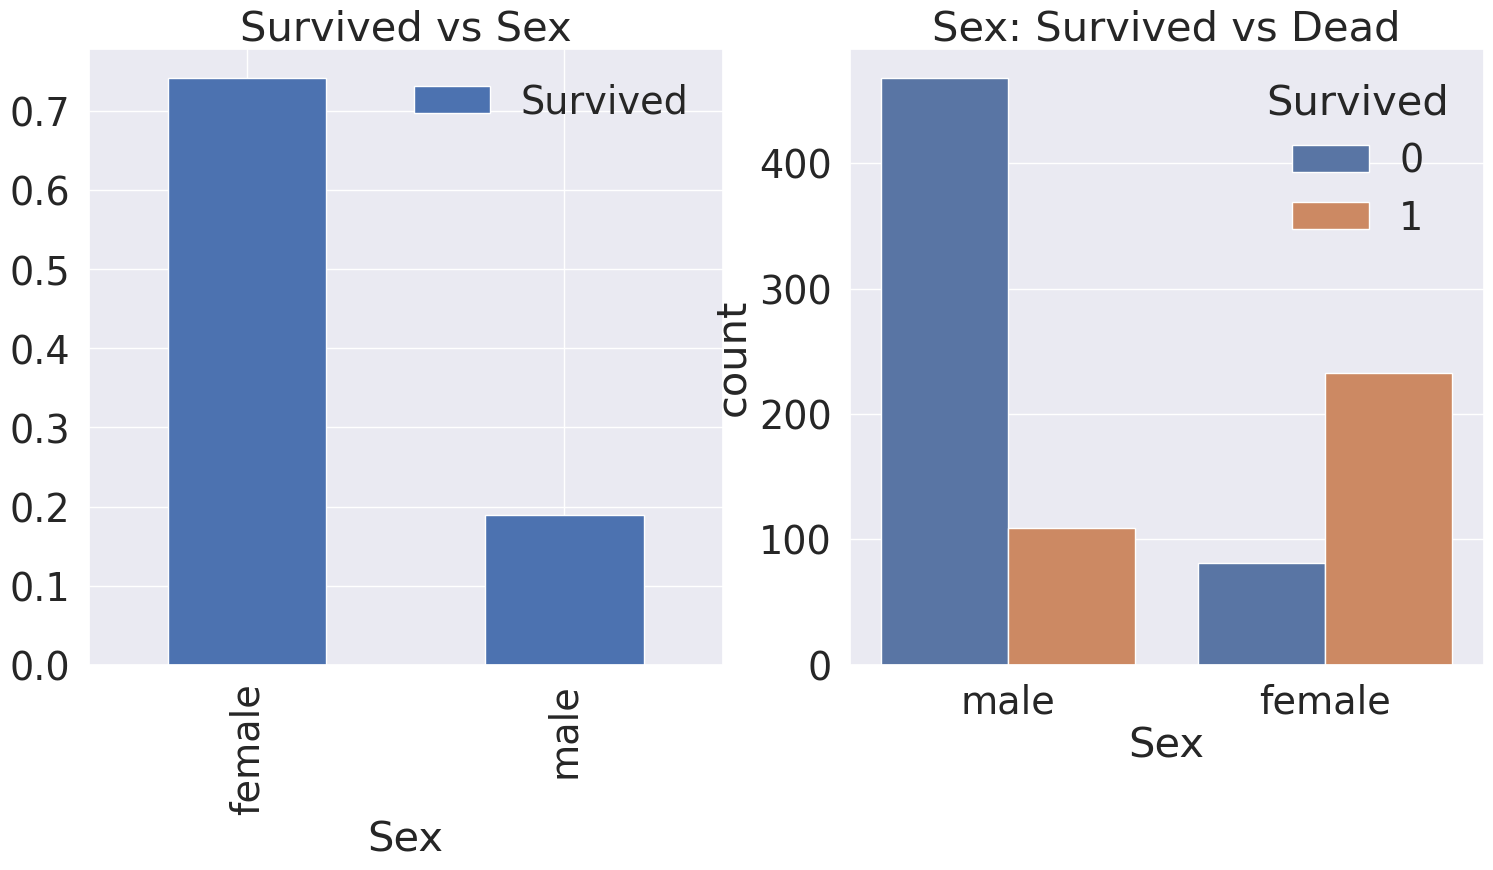

In [105]:
# 위와 같은 방식으로 시각화 (factorplot 안되니까 그냥 제외함.)
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()
#여자 생존확률이 더 높음

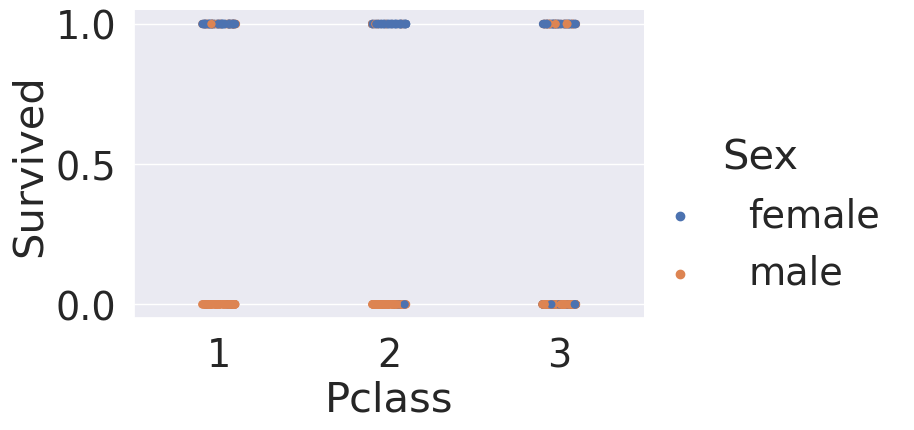

In [106]:
sns.catplot(hue = 'Sex', y='Survived', x = 'Pclass', data=df_train,
               size=6, aspect=1.5) #얘도 약간 이상함.

# Age

In [107]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


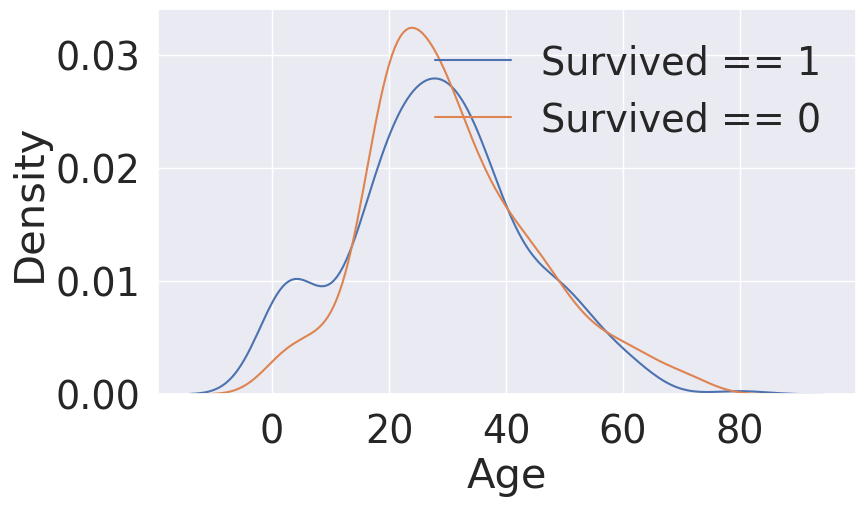

In [108]:
# kdeplot = kernel density estimator plot
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

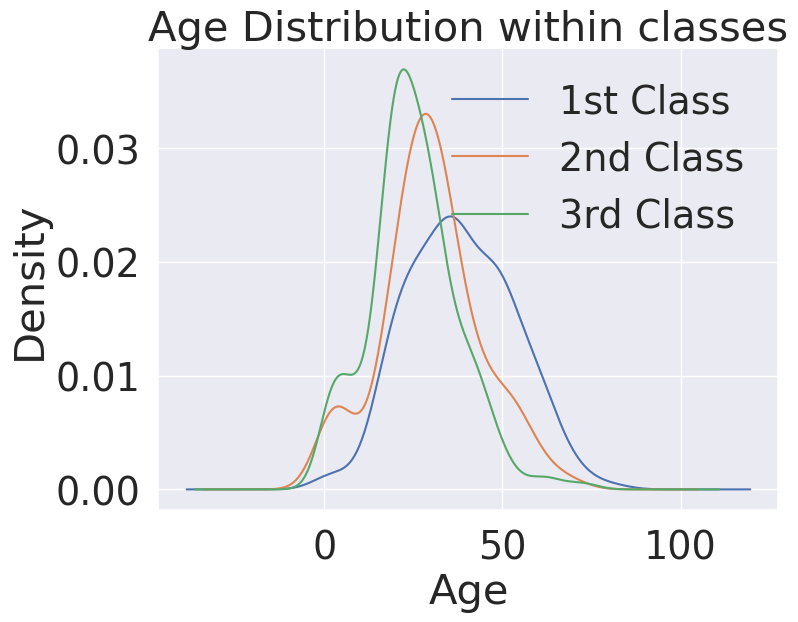

In [109]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
# 클래스가 높을수록 나이가 많음.

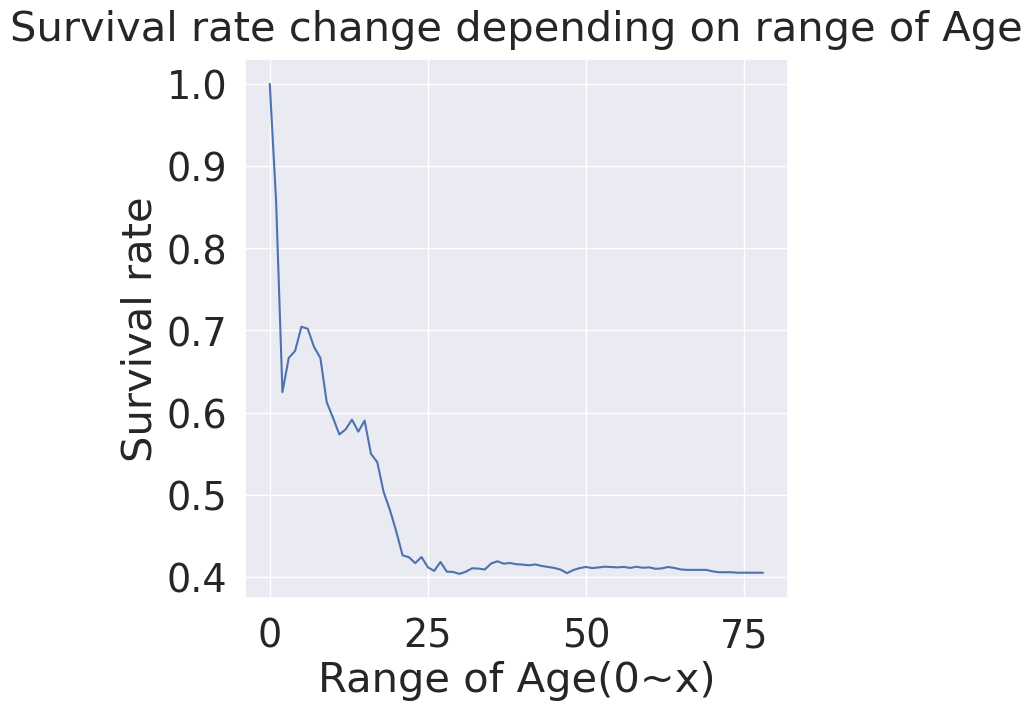

In [110]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()
#나이가 어릴수록 생존확률이 

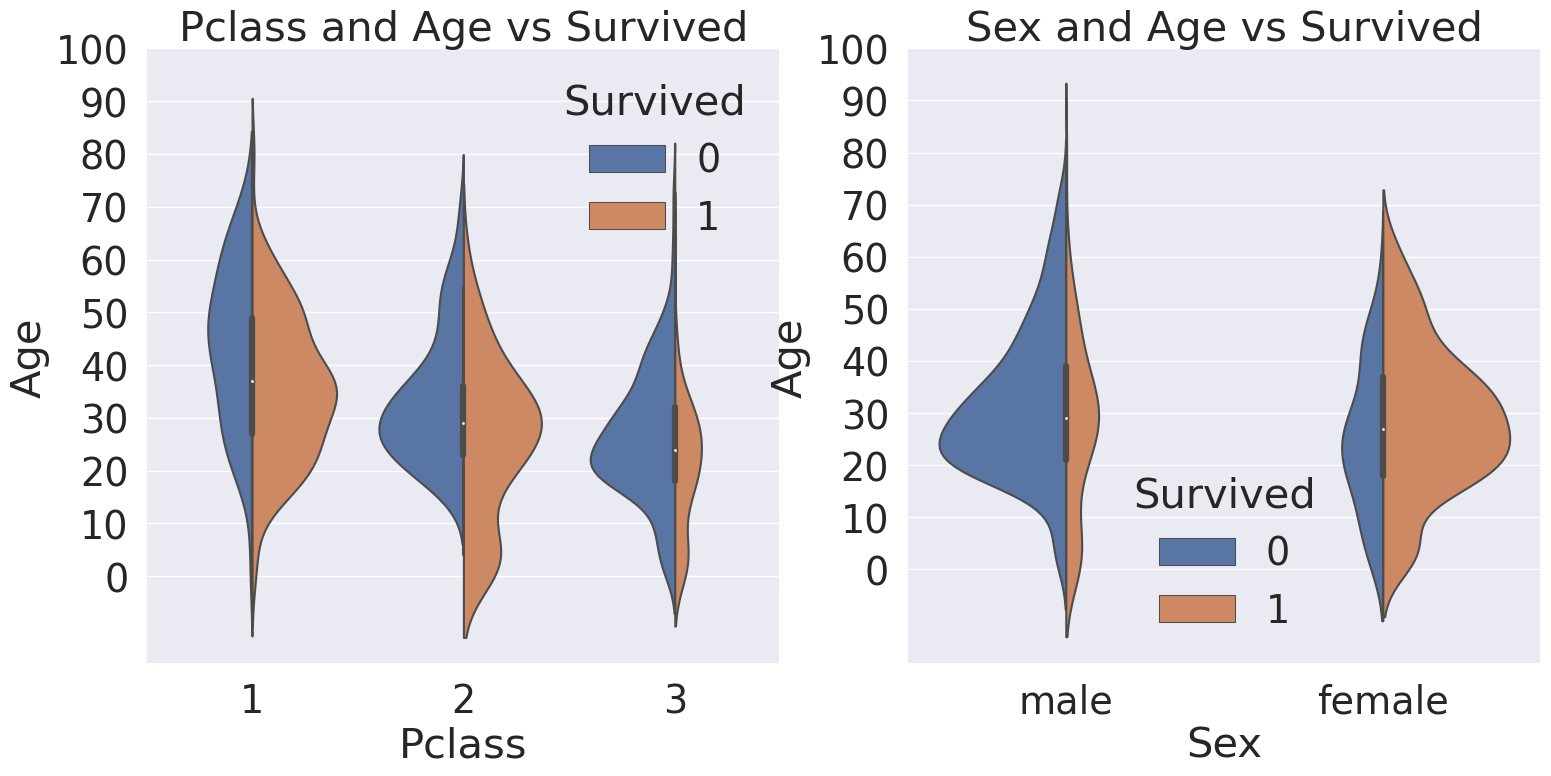

In [111]:
#seaborn의 violinplot 두가지 features를 연관시킨 그래프 - 여성과 아이가 생존확률 
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass", y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0]) # split = True를 안하면 pclass마다 각각 두개의 그래프가 따로 나옴
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # y축 나누기
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<Axes: xlabel='Embarked'>

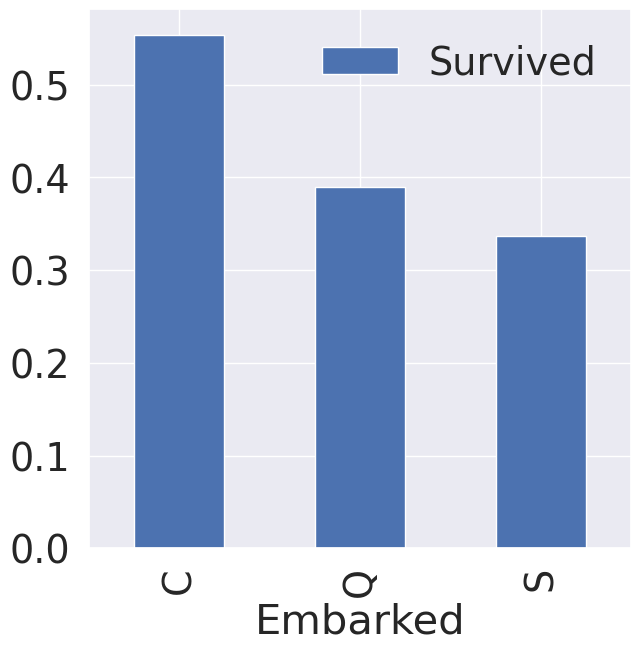

In [112]:
#탑승한 곳에 따른 생존률
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

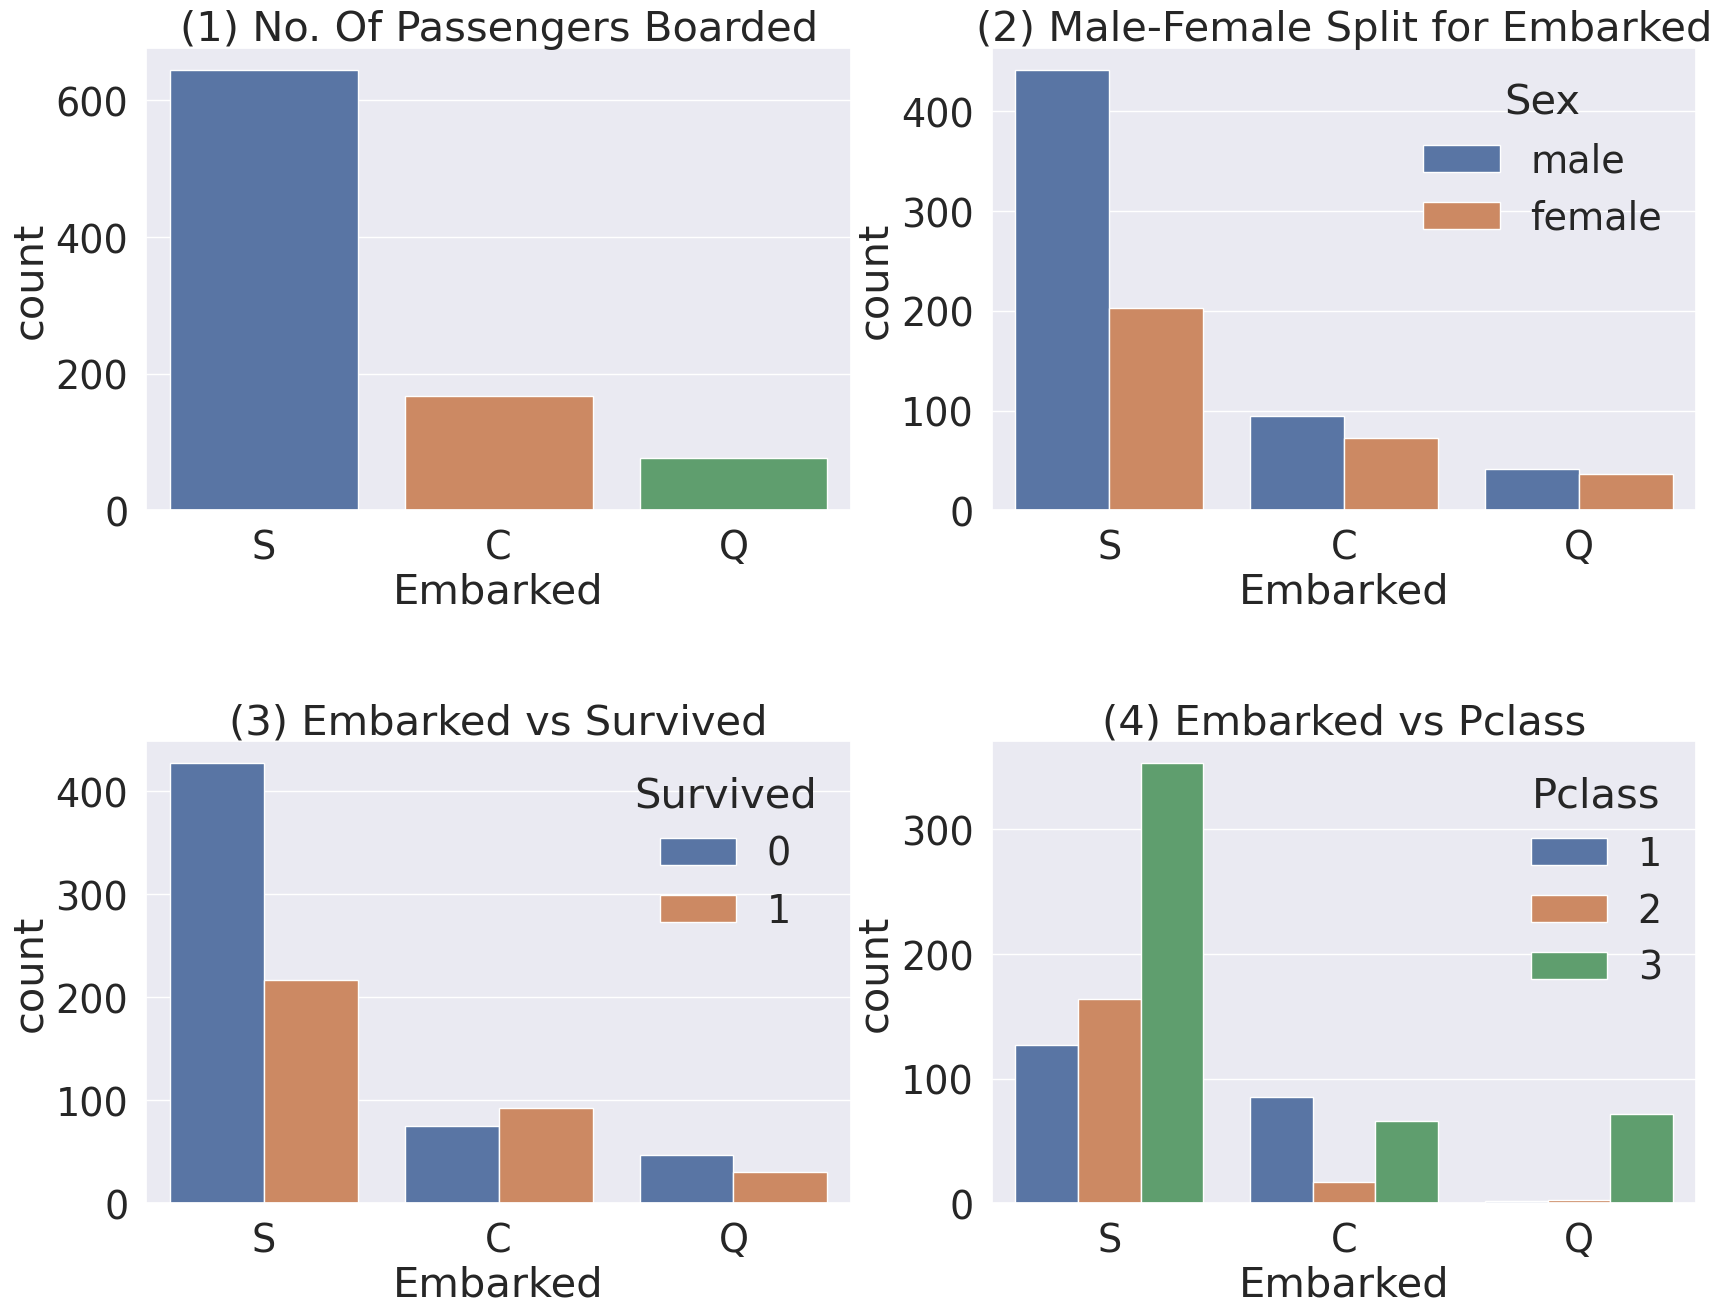

In [113]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# family

In [114]:
#합쳐서 family로 분석
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #본인 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #본인 포함

In [115]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


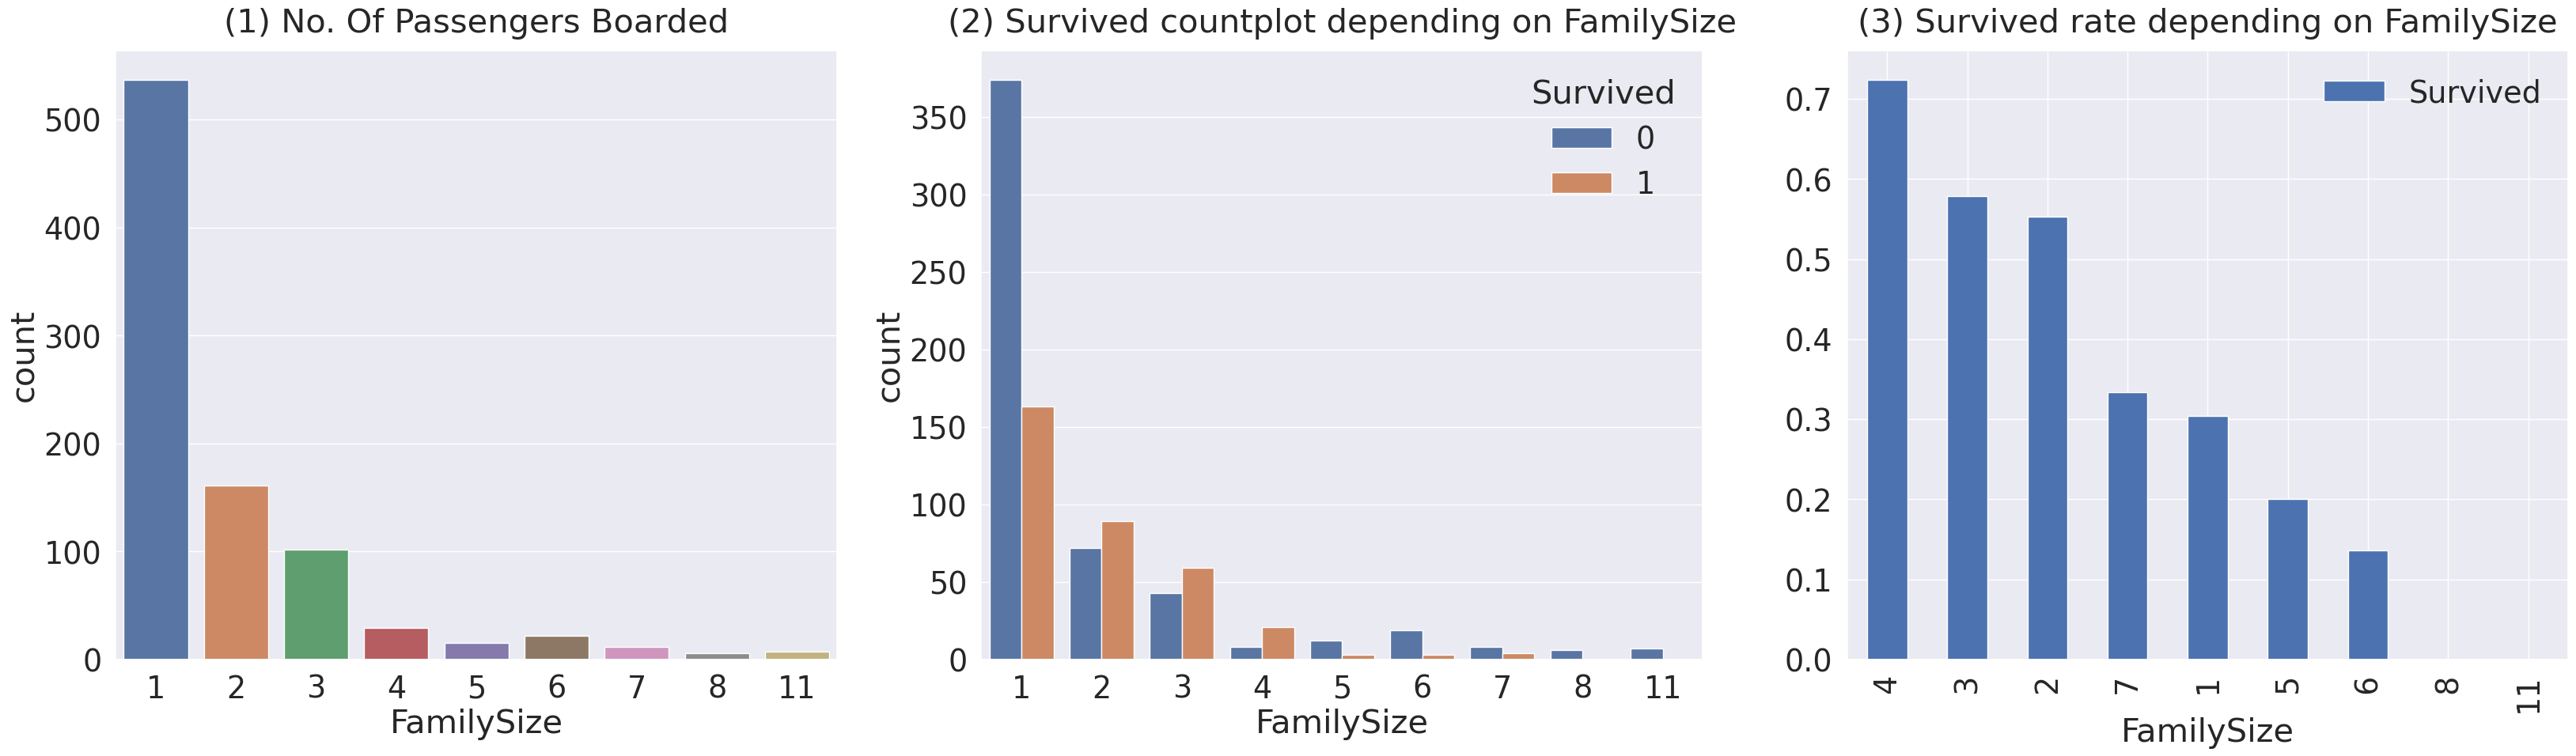

In [116]:
#familysize와 생존률의 관계
# FamilySize가 2,3,4일때 많이 살아남음.

f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

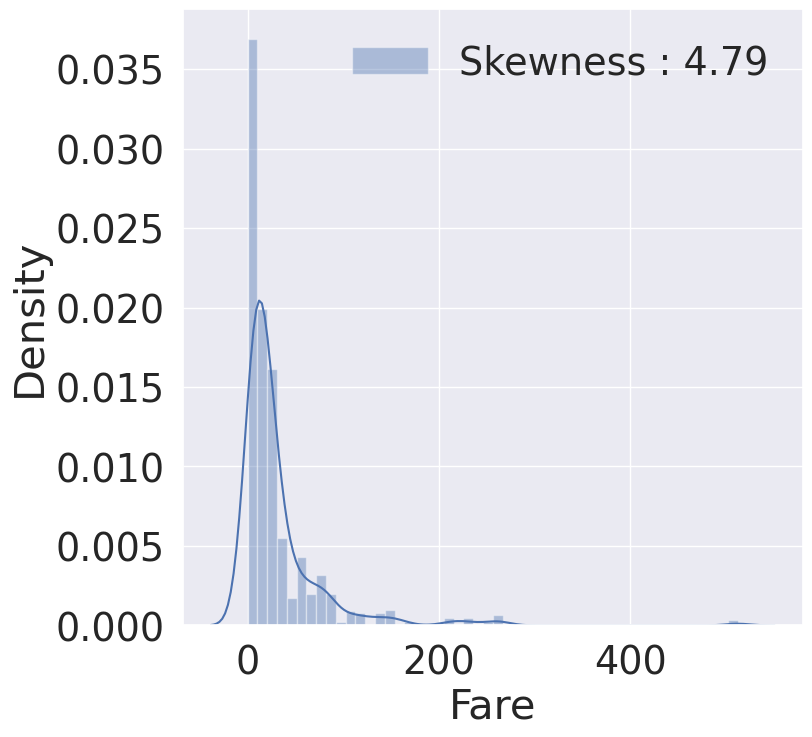

In [117]:
#탑승요금을 histogram으로 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# Cabin - NAN이 너무 많음, Tickets - 다양한 값이 많은 문자열이라 처리가 힘듬/ 제외

In [118]:
#feature engineering
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') # 알파벳 여러개와 .이 마지막에 오는 문자열을 추출할 수 있다고 함?
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #이름의 title 추출

In [119]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

<Axes: xlabel='Initial'>

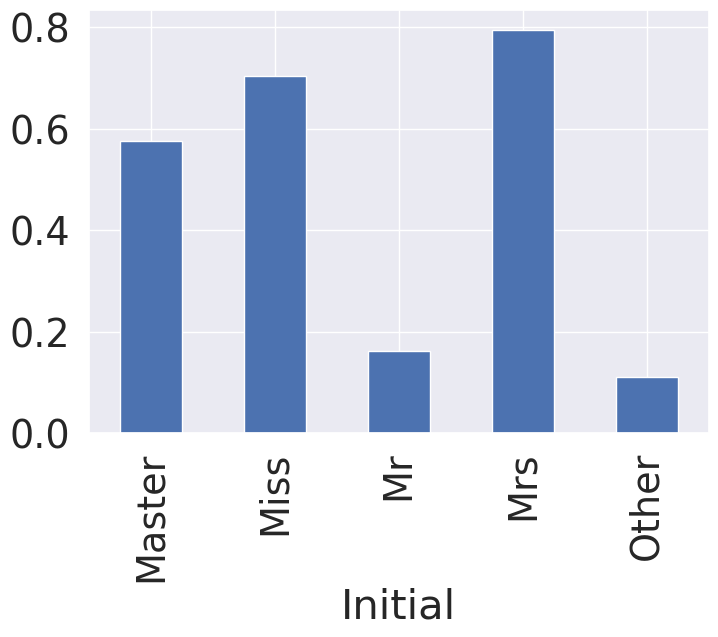

In [120]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [121]:
# Age의 평균을 이용해서 null 값을 입력
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [122]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [123]:
# 2개밖에 없으니 가장 많은걸로 채워줌(S)
df_train['Embarked'].fillna('S', inplace=True)

In [124]:
# countinuous한 Age를 카테고리 value로 전환
# 10대, 20대, 30대 ... , 이상으로 총 7 분류
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [125]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [126]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [127]:
# 중복되는 age_cat 컬럼과 원래 컬럼(대체 가능) age제거
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [128]:
#사전 순서대로 mapping, 문자열은 인식할수 없으니 바꿔주는 과정.
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [129]:
#map 사용
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [130]:
#sex까지 바꿔
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

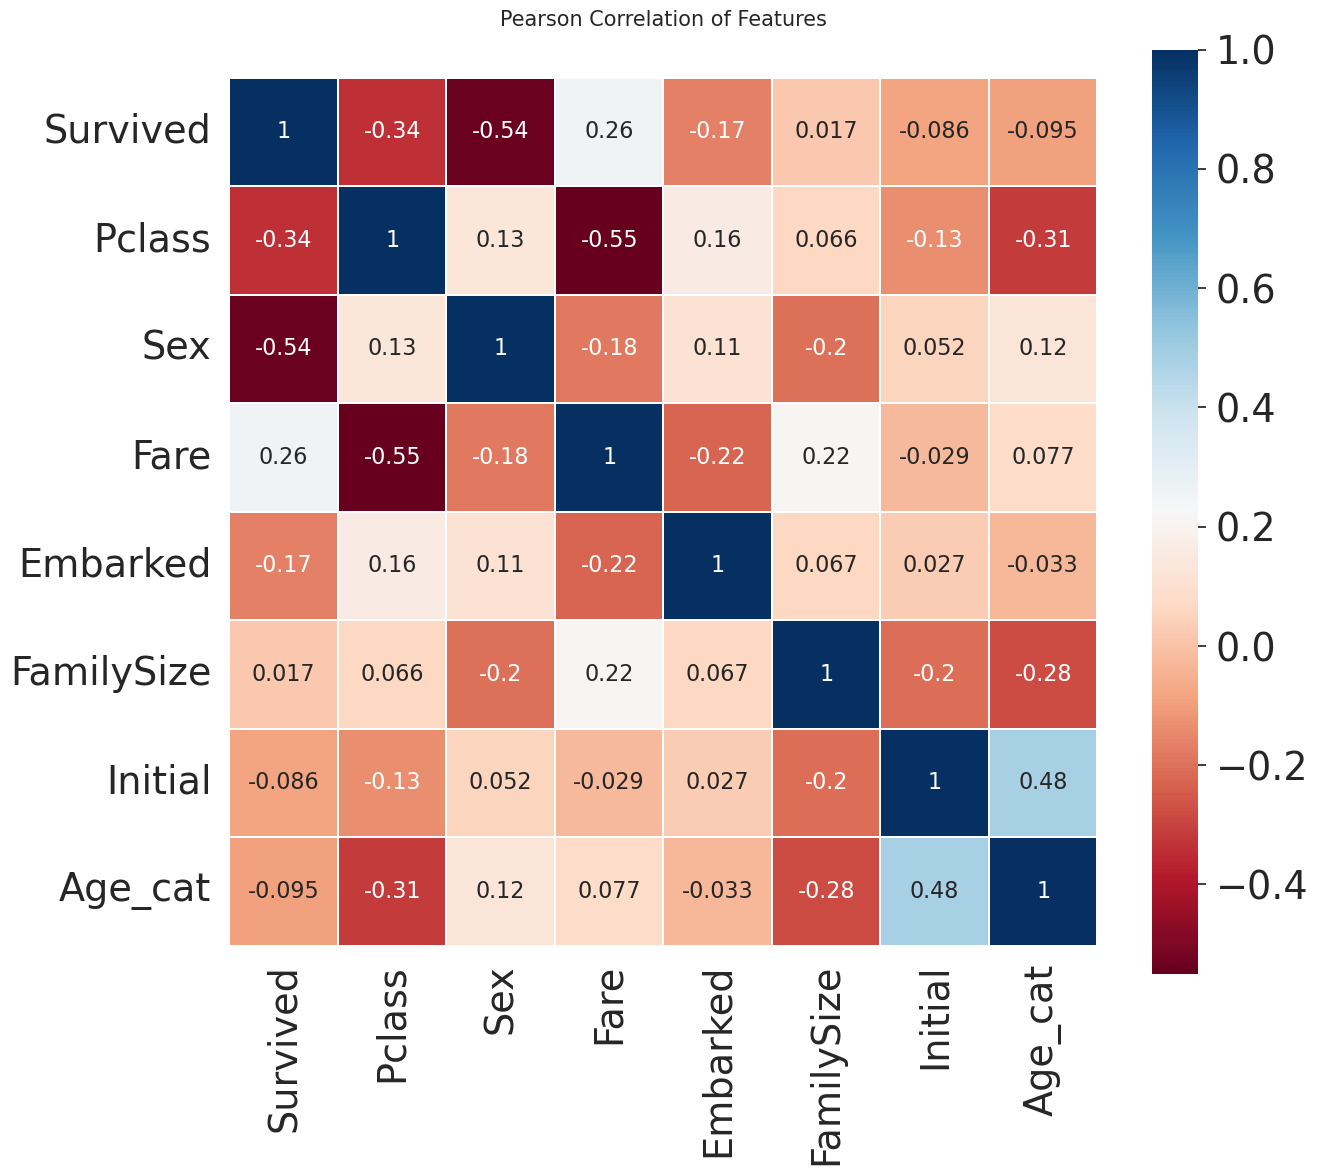

In [131]:
# 상관계수 
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [132]:
# 원핫 인코딩
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [133]:
# 원핫 
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [134]:
#필요한 것 제외 삭제
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [135]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics#모델의 평가를 위해
from sklearn.model_selection import train_test_split#training set을 쉽게 나눠줌

# 모델링

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

In [137]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [138]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2023)

In [139]:
#모델 객체 생성 후 fit메소드로 학습시키기
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [140]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존을 맞춤


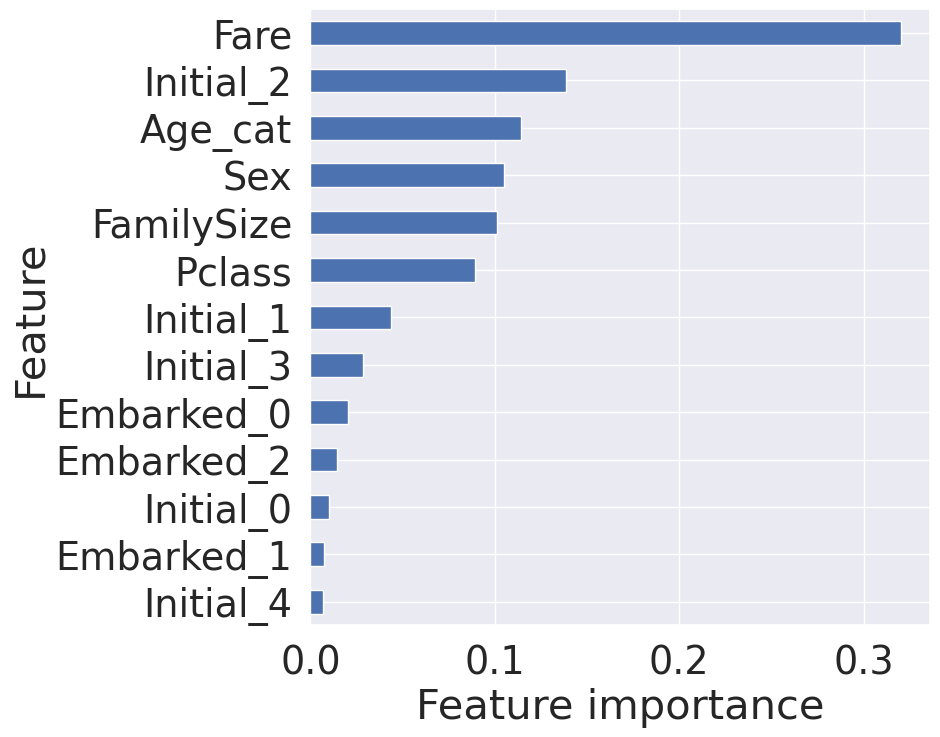

In [143]:
# 어떤 feature가 가장 관련있는지 
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [145]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [ ]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)